DATA PREPROCESSING

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
country_mapping = {
    "AFG": "Afghanistan",
    "ALB": "Albania",
    "DZA": "Algeria",
    "AGO": "Angola",
    "ARG": "Argentina",
    "ARM": "Armenia",
    "AUS": "Australia",
    "AUT": "Austria",
    "AZE": "Azerbaijan",
    "BHS": "Bahamas",
    "BGD": "Bangladesh",
    "BRB": "Barbados",
    "BLR": "Belarus",
    "BEL": "Belgium",
    "BLZ": "Belize",
    "BEN": "Benin",
    "BOL": "Bolivia",
    "BIH": "Bosnia and Herzegovina",
    "BWA": "Botswana",
    "BRA": "Brazil",
    "BGR": "Bulgaria",
    "BFA": "Burkina Faso",
    "BDI": "Burundi",
    "CPV": "Cabo Verde",
    "KHM": "Cambodia",
    "CMR": "Cameroon",
    "CAN": "Canada",
    "CAF": "Central African Republic",
    "TCD": "Chad",
    "CHL": "Chile",
    "CHN": "China",
    "COL": "Colombia",
    "COM": "Comoros",
    "COG": "Congo",
    "CRI": "Costa Rica",
    "HRV": "Croatia",
    "CUB": "Cuba",
    "CYP": "Cyprus",
    "CZE": "Czechia",
    "CIV": "Côte d'Ivoire",
    "DNK": "Denmark",
    "DJI": "Djibouti",
    "ECU": "Ecuador",
    "EGY": "Egypt",
    "SLV": "El Salvador",
    "EST": "Estonia",
    "SWZ": "Eswatini",
    "ETH": "Ethiopia",
    "FJI": "Fiji",
    "FIN": "Finland",
    "FRA": "France",
    "PYF": "French Polynesia",
    "GAB": "Gabon",
    "GMB": "Gambia",
    "GEO": "Georgia",
    "DEU": "Germany",
    "GHA": "Ghana",
    "GRC": "Greece",
    "GTM": "Guatemala",
    "GIN": "Guinea",
    "GNB": "Guinea-Bissau",
    "GUY": "Guyana",
    "HTI": "Haiti",
    "HND": "Honduras",
    "HUN": "Hungary",
    "ISL": "Iceland",
    "IND": "India",
    "IDN": "Indonesia",
    "IRN": "Iran (Islamic Republic of)",
    "IRQ": "Iraq",
    "IRL": "Ireland",
    "ISR": "Israel",
    "ITA": "Italy",
    "JAM": "Jamaica",
    "JPN": "Japan",
    "JOR": "Jordan",
    "KAZ": "Kazakhstan",
    "KEN": "Kenya",
    "KIR": "Kiribati",
    "KWT": "Kuwait",
    "KGZ": "Kyrgyzstan",
    "LAO": "Lao People's Democratic Republic",
    "LVA": "Latvia",
    "LBN": "Lebanon",
    "LSO": "Lesotho",
    "LBR": "Liberia",
    "LBY": "Libya",
    "LTU": "Lithuania",
    "LUX": "Luxembourg",
    "MDG": "Madagascar",
    "MWI": "Malawi",
    "MYS": "Malaysia",
    "MDV": "Maldives",
    "MLI": "Mali",
    "MLT": "Malta",
    "MRT": "Mauritania",
    "MUS": "Mauritius",
    "MEX": "Mexico",
    "MNG": "Mongolia",
    "MNE": "Montenegro",
    "MAR": "Morocco",
    "MOZ": "Mozambique",
    "MMR": "Myanmar",
    "NAM": "Namibia",
    "NPL": "Nepal",
    "NLD": "Netherlands",
    "NCL": "New Caledonia",
    "NZL": "New Zealand",
    "NIC": "Nicaragua",
    "NER": "Niger",
    "NGA": "Nigeria",
    "MKD": "North Macedonia",
    "NOR": "Norway",
    "OMN": "Oman",
    "PAK": "Pakistan",
    "PAN": "Panama",
    "PNG": "Papua New Guinea",
    "PRY": "Paraguay",
    "PER": "Peru",
    "PHL": "Philippines",
    "POL": "Poland",
    "PRT": "Portugal",
    "MDA": "Republic of Moldova",
    "ROU": "Romania",
    "RUS": "Russian Federation",
    "RWA": "Rwanda",
    "LCA": "Saint Lucia",
    "STP": "Sao Tome and Principe",
    "SAU": "Saudi Arabia",
    "SEN": "Senegal",
    "SRB": "Serbia",
    "SLE": "Sierra Leone",
    "SVK": "Slovakia",
    "SVN": "Slovenia",
    "SLB": "Solomon Islands",
    "SOM": "Somalia",
    "ZAF": "South Africa",
    "ESP": "Spain",
    "LKA": "Sri Lanka",
    "SUR": "Suriname",
    "SWE": "Sweden",
    "CHE": "Switzerland",
    "SYR": "Syrian Arab Republic",
    "TJK": "Tajikistan",
    "THA": "Thailand",
    "TLS": "Timor-Leste",
    "TGO": "Togo",
    "TTO": "Trinidad and Tobago",
    "TUN": "Tunisia",
    "TKM": "Turkmenistan",
    "TUR": "Türkiye",
    "UGA": "Uganda",
    "UKR": "Ukraine",
    "ARE": "United Arab Emirates",
    "GBR": "United Kingdom",
    "TZA": "Tanzania",
    "USA": "United States of America",
    "URY": "Uruguay",
    "UZB": "Uzbekistan",
    "VUT": "Vanuatu",
    "VEN": "Venezuela (Bolivarian Republic of)",
    "VNM": "Viet Nam",
    "YEM": "Yemen",
    "ZMB": "Zambia",
    "ZWE": "Zimbabwe"
}


In [4]:
df = pd.read_csv('colorectal_cancer.csv')
df['Country'] = df['Country'].map(country_mapping)
df = df.dropna(subset=['Country'])
df = df.set_index('Country')
df.index.name = 'Country'

In [5]:
df_world = pd.read_csv('world bank 2.csv')
df_world_pivot = df_world.pivot_table(
    index='Country Name',
    columns='Series Name',
    values='2016 [YR2016]',
    aggfunc='first'
)
df_world_pivot.index.name = 'Country'

In [6]:
df_hrana = pd.read_csv('diabetes hrana.csv')
df_hrana_pivot = df_hrana.pivot_table(
    index='Area',
    columns='Item',
    values='Value',
    aggfunc='first'
)
df_hrana_pivot.index.name = 'Country'
df_hrana_pivot.columns = df_hrana_pivot.columns.astype(str)

In [7]:
df_makro = pd.read_csv('Makronutrienti.csv')
df_makro_pivot = df_makro.pivot_table(
    index='Area',
    columns='Indicator',
    values='Value',
    aggfunc='first'
)
df_makro_pivot.index.name = 'Country'
df_makro_pivot.columns = df_makro_pivot.columns.astype(str)

In [8]:
df_sug = pd.read_csv('hrana sekeri .csv')
df_sug_pivot = df_sug.pivot_table(
    index='Area',
    columns='Item',
    values='Value',
    aggfunc='first'
)
df_sug_pivot.index.name = 'Country'
df_sug_pivot.columns = df_sug_pivot.columns.astype(str)

In [9]:
df_combined = (
    df
    .join(df_world_pivot, how='inner')
    .join(df_hrana_pivot, how='inner')
    .join(df_makro_pivot, how='inner')
    .join(df_sug_pivot, how='inner')
)

In [10]:
print("Rows in df_combined:", len(df_combined))
print("Index name:", df_combined.index.name)

Rows in df_combined: 145
Index name: Country


In [11]:
import pandas as pd
df_tobacco = pd.read_csv(
    'tobacco_prevalence_2022.csv'
)

In [12]:
df_combined = df_combined.reset_index().rename(columns={'index':'Country'})
df_combined['Country'] = (
    df_combined['Country']
      .astype(str)
      .str.strip()
      .str.lower()
)
df_tobacco['Country'] = (
    df_tobacco['Country']
      .astype(str)
      .str.strip()
      .str.lower()
)

In [13]:
common = set(df_combined['Country']).intersection(df_tobacco['Country'])
print(f"{len(common)}/{len(df_combined)} countries in common")

145/145 countries in common


In [14]:
df_final = df_combined.merge(
    df_tobacco[['Country',
                'Prevalence of current tobacco use (% of adults)']],
    on='Country',
    how='left'
)
print("After merge:", df_final.shape)

After merge: (145, 32)


In [15]:
med = df_final['Prevalence of current tobacco use (% of adults)'].median()
df_final['Prevalence of current tobacco use (% of adults)'] \
    .fillna(med, inplace=True)
df_final = df_final.set_index('Country', drop=True)

C:\Users\Pavle\AppData\Local\Temp\ipykernel_21160\2433045903.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  .fillna(med, inplace=True)


In [16]:
df_final

,Number,Diabetes prevalence (% of population ages 20 to 79),"Population, total",Prevalence of overweight (% of adults),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Number of obese adults (18 years and older) (million),...,Coconut Oil,"Fruits, other",Honey,Olive Oil,"Oranges, Mandarines",Palm Oil,Sugar (Raw Equivalent),"Sweeteners, Other","Vegetables, other",Prevalence of current tobacco use (% of adults)
Country,,,,,,,,,,,,,,,,,,,,,
afghanistan,1163,..,34700612,38.89,0.013,105,37.2,64.2,12.3,1.3,...,NaN,9.51,0.56,0.46,3.67,80.83,124.26,3.13,20.06,22.70
albania,522,..,2876101,59.7,5.13,132,106.2,111,58.3,0.4,...,NaN,58.33,9.80,65.30,13.76,NaN,214.61,19.32,114.00,21.90
algeria,7747,..,40850721,53.46,0.6,142,93.4,92.7,28.1,4.5,...,1.06,36.57,1.42,42.23,24.43,8.96,272.75,7.37,81.86,21.20
angola,805,..,29183070,28.77,7.01,115,54.9,50.6,18.4,1,...,0.00,12.88,8.08,3.60,0.13,155.96,105.64,11.23,18.40,19.55
azerbaijan,1741,..,9757812,58.85,1.46,123,65.2,91.2,29.9,1.4,...,0.15,49.04,2.28,3.18,2.86,NaN,166.54,30.62,67.00,19.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
north macedonia,900,..,1906313,59.4,4.36,117,NaN,NaN,NaN,0.4,...,NaN,35.87,4.83,19.75,9.59,NaN,352.00,19.06,90.48,19.55
burkina faso,460,..,19334856,17.26,9.72,119,59.8,76.4,12.6,0.3,...,4.60,5.98,0.01,0.12,0.18,64.97,71.69,1.51,10.96,14.30
uruguay,2092,..,3379283,62.45,5.86,129,104.6,94.4,54.2,0.6,...,NaN,21.45,20.63,11.50,26.21,NaN,400.13,46.08,29.54,20.50


In [17]:
df_final.drop(
    columns=['Diabetes prevalence (% of population ages 20 to 79)'],
    inplace=True
)

In [18]:
df_final.isnull().sum()

Number                                                                                                    0
Population, total                                                                                         0
Prevalence of overweight (% of adults)                                                                    0
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)      0
Average dietary energy supply adequacy (percent) (3-year average)                                         3
Average fat supply (g/cap/day) (3-year average)                                                          23
Average protein supply (g/cap/day) (3-year average)                                                      23
Average supply of protein of animal origin (g/cap/day) (3-year average)                                  23
Number of obese adults (18 years and older) (million)                                                     1
Per capita food supply varia

In [19]:
for col in df_final.columns:
    if col != 'Number':
        df_final[col] = pd.to_numeric(df_final[col], errors='coerce')


In [20]:
threshold = 0.3
miss_frac = df_final.isnull().mean()
cols_to_drop = miss_frac[miss_frac > threshold].index.tolist()
df_final.drop(columns=cols_to_drop, inplace=True)

num_cols = df_final.select_dtypes(include=[np.number]).columns
medians = df_final[num_cols].median()
df_final[num_cols] = df_final[num_cols].fillna(medians)

In [21]:
df_final.isnull().sum()

Number                                                                                                  0
Population, total                                                                                       0
Prevalence of overweight (% of adults)                                                                  0
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)    0
Average dietary energy supply adequacy (percent) (3-year average)                                       0
Average fat supply (g/cap/day) (3-year average)                                                         0
Average protein supply (g/cap/day) (3-year average)                                                     0
Average supply of protein of animal origin (g/cap/day) (3-year average)                                 0
Number of obese adults (18 years and older) (million)                                                   0
Per capita food supply variability (kcal/cap/d

In [22]:
rows, cols = df_final.shape
print(f"Rows: {rows}")
print(f"Columns: {cols}")

Rows: 145
Columns: 26


In [23]:
df_final

,Number,"Population, total",Prevalence of overweight (% of adults),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Number of obese adults (18 years and older) (million),Per capita food supply variability (kcal/cap/day),...,Vitamin C supply,Zinc supply,"Fruits, other",Honey,Olive Oil,"Oranges, Mandarines",Sugar (Raw Equivalent),"Sweeteners, Other","Vegetables, other",Prevalence of current tobacco use (% of adults)
Country,,,,,,,,,,,,,,,,,,,,,
afghanistan,1163,34700612,38.89,0.013,105.0,37.20,64.20,12.3,1.3,62.0,...,0.0,0.42,9.51,0.56,0.46,3.67,124.26,3.13,20.06,22.70
albania,522,2876101,59.70,5.130,132.0,106.20,111.00,58.3,0.4,64.0,...,1.0,0.61,58.33,9.80,65.30,13.76,214.61,19.32,114.00,21.90
algeria,7747,40850721,53.46,0.600,142.0,93.40,92.70,28.1,4.5,23.0,...,1.0,0.77,36.57,1.42,42.23,24.43,272.75,7.37,81.86,21.20
angola,805,29183070,28.77,7.010,115.0,54.90,50.60,18.4,1.0,166.0,...,0.0,0.74,12.88,8.08,3.60,0.13,105.64,11.23,18.40,19.55
azerbaijan,1741,9757812,58.85,1.460,123.0,65.20,91.20,29.9,1.4,95.0,...,0.0,0.19,49.04,2.28,3.18,2.86,166.54,30.62,67.00,19.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
north macedonia,900,1906313,59.40,4.360,117.0,75.45,77.25,30.9,0.4,71.0,...,0.0,0.84,35.87,4.83,19.75,9.59,352.00,19.06,90.48,19.55
burkina faso,460,19334856,17.26,9.720,119.0,59.80,76.40,12.6,0.3,5.0,...,1.0,2.42,5.98,0.01,0.12,0.18,71.69,1.51,10.96,14.30
uruguay,2092,3379283,62.45,5.860,129.0,104.60,94.40,54.2,0.6,59.0,...,0.0,0.41,21.45,20.63,11.50,26.21,400.13,46.08,29.54,20.50


In [24]:
print(df_final.columns.tolist())

['Number', 'Population, total', 'Prevalence of overweight (% of adults)', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)', 'Average dietary energy supply adequacy (percent) (3-year average)', 'Average fat supply (g/cap/day) (3-year average)', 'Average protein supply (g/cap/day) (3-year average)', 'Average supply of protein of animal origin (g/cap/day) (3-year average)', 'Number of obese adults (18 years and older) (million)', 'Per capita food supply variability (kcal/cap/day)', 'Prevalence of anemia among women of reproductive age (15-49 years) (percent)', 'Carbohydrate (available) supply', 'Energy supply', 'Fat supply', 'Magnesium supply', 'Protein supply', 'Vitamin C supply', 'Zinc supply', 'Fruits, other', 'Honey', 'Olive Oil', 'Oranges, Mandarines', 'Sugar (Raw Equivalent)', 'Sweeteners, Other', 'Vegetables, other', 'Prevalence of current tobacco use (% of adults)']


In [25]:
df_final

,Number,"Population, total",Prevalence of overweight (% of adults),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Number of obese adults (18 years and older) (million),Per capita food supply variability (kcal/cap/day),...,Vitamin C supply,Zinc supply,"Fruits, other",Honey,Olive Oil,"Oranges, Mandarines",Sugar (Raw Equivalent),"Sweeteners, Other","Vegetables, other",Prevalence of current tobacco use (% of adults)
Country,,,,,,,,,,,,,,,,,,,,,
afghanistan,1163,34700612,38.89,0.013,105.0,37.20,64.20,12.3,1.3,62.0,...,0.0,0.42,9.51,0.56,0.46,3.67,124.26,3.13,20.06,22.70
albania,522,2876101,59.70,5.130,132.0,106.20,111.00,58.3,0.4,64.0,...,1.0,0.61,58.33,9.80,65.30,13.76,214.61,19.32,114.00,21.90
algeria,7747,40850721,53.46,0.600,142.0,93.40,92.70,28.1,4.5,23.0,...,1.0,0.77,36.57,1.42,42.23,24.43,272.75,7.37,81.86,21.20
angola,805,29183070,28.77,7.010,115.0,54.90,50.60,18.4,1.0,166.0,...,0.0,0.74,12.88,8.08,3.60,0.13,105.64,11.23,18.40,19.55
azerbaijan,1741,9757812,58.85,1.460,123.0,65.20,91.20,29.9,1.4,95.0,...,0.0,0.19,49.04,2.28,3.18,2.86,166.54,30.62,67.00,19.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
north macedonia,900,1906313,59.40,4.360,117.0,75.45,77.25,30.9,0.4,71.0,...,0.0,0.84,35.87,4.83,19.75,9.59,352.00,19.06,90.48,19.55
burkina faso,460,19334856,17.26,9.720,119.0,59.80,76.40,12.6,0.3,5.0,...,1.0,2.42,5.98,0.01,0.12,0.18,71.69,1.51,10.96,14.30
uruguay,2092,3379283,62.45,5.860,129.0,104.60,94.40,54.2,0.6,59.0,...,0.0,0.41,21.45,20.63,11.50,26.21,400.13,46.08,29.54,20.50


In [26]:
print(df_combined['Number'].head())
print(df_combined['Number'].describe())

0    1163
1     522
2    7747
3     805
4    1741
Name: Number, dtype: int64
count       145.000000
mean      10943.531034
std       45989.855041
min           8.000000
25%         365.000000
50%        1127.000000
75%        5723.000000
max      517106.000000
Name: Number, dtype: float64


In [27]:
df_activity = pd.read_csv('activity.csv')
df_activity_wide = df_activity.pivot(
    index='Country',
    columns='Indicator',
    values='Value'
).reset_index()

df_activity_wide = df_activity_wide.rename(
    columns={
        'Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%)':
        'insufficient_physical_activity_pct'
    }
)

print(df_activity_wide.head())

Indicator      Country  insufficient_physical_activity_pct
0          Afghanistan                                33.4
1              Albania                                24.3
2              Algeria                                29.0
3              Andorra                                27.2
4               Angola                                17.3


In [28]:
df_activity_wide = df_activity_wide.set_index('Country')
df_activity_wide.columns.name = None

df_activity_wide.index.name = None
print(df_activity_wide.head())

             insufficient_physical_activity_pct
Afghanistan                                33.4
Albania                                    24.3
Algeria                                    29.0
Andorra                                    27.2
Angola                                     17.3


In [29]:
print("df_final.columns:", df_final.columns.tolist())
print("df_final.index.name:", df_final.index.name)
print("df_activity_wide.columns:", df_activity_wide.columns.tolist())
print("df_activity_wide.index.name:", df_activity_wide.index.name)

df_final.columns: ['Number', 'Population, total', 'Prevalence of overweight (% of adults)', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)', 'Average dietary energy supply adequacy (percent) (3-year average)', 'Average fat supply (g/cap/day) (3-year average)', 'Average protein supply (g/cap/day) (3-year average)', 'Average supply of protein of animal origin (g/cap/day) (3-year average)', 'Number of obese adults (18 years and older) (million)', 'Per capita food supply variability (kcal/cap/day)', 'Prevalence of anemia among women of reproductive age (15-49 years) (percent)', 'Carbohydrate (available) supply', 'Energy supply', 'Fat supply', 'Magnesium supply', 'Protein supply', 'Vitamin C supply', 'Zinc supply', 'Fruits, other', 'Honey', 'Olive Oil', 'Oranges, Mandarines', 'Sugar (Raw Equivalent)', 'Sweeteners, Other', 'Vegetables, other', 'Prevalence of current tobacco use (% of adults)']
df_final.index.name: Country
df_activity_wid

In [30]:
if df_final.index.name and df_final.index.name.lower() == 'country':
    df_final = df_final.reset_index()

if df_activity_wide.index.name and df_activity_wide.index.name.lower() == 'country':
    df_activity_wide = df_activity_wide.reset_index()
elif df_activity_wide.index.inferred_type in ['string', 'mixed']:

    df_activity_wide = df_activity_wide.reset_index().rename(columns={'index': 'Country'})


for df, df_name in [(df_final, 'df_final'), (df_activity_wide, 'df_activity_wide')]:

    if 'Country' not in df.columns:
        possible_country_cols = [col for col in df.columns if col.lower().strip() in ['country', 'countries', 'nation', 'country_name']]
        if possible_country_cols:
            df.rename(columns={possible_country_cols[0]: 'Country'}, inplace=True)
        else:
            print(f"{df_name} columns:", df.columns.tolist())
            print(f"{df_name} head:\n", df.head())
            raise KeyError(f"'Country' column not found in {df_name}. Available columns: {df.columns.tolist()}")


    df.columns = df.columns.str.strip()
    df['Country'] = df['Country'].str.strip().str.lower()


df_merged = df_final.merge(
    df_activity_wide,
    on='Country',
    how='left'
)


df_merged = df_merged.set_index('Country')


missing = df_merged['insufficient_physical_activity_pct'].isna().sum()
print(f'Missing activity for {missing} countries out of {len(df_merged)}')

print(df_merged.head())

Missing activity for 2 countries out of 145
             Number  Population, total  \
Country                                  
afghanistan    1163           34700612   
albania         522            2876101   
algeria        7747           40850721   
angola          805           29183070   
azerbaijan     1741            9757812   

             Prevalence of overweight (% of adults)  \
Country                                               
afghanistan                                   38.89   
albania                                       59.70   
algeria                                       53.46   
angola                                        28.77   
azerbaijan                                    58.85   

             Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
Country                                                                                                             
afghanistan                              

In [31]:
df_merged[df_merged['insufficient_physical_activity_pct'].isna()]

,Number,"Population, total",Prevalence of overweight (% of adults),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Number of obese adults (18 years and older) (million),Per capita food supply variability (kcal/cap/day),...,Zinc supply,"Fruits, other",Honey,Olive Oil,"Oranges, Mandarines",Sugar (Raw Equivalent),"Sweeteners, Other","Vegetables, other",Prevalence of current tobacco use (% of adults),insufficient_physical_activity_pct
Country,,,,,,,,,,,,,,,,,,,,,
french polynesia,48,279178,72.490,5.13,117.0,116.9,105.3,68.4,0.1,20.0,...,0.57,51.83,3.61,21.94,5.78,203.12,23.66,33.10,19.55,NaN
new caledonia,91,283423,52.575,5.13,118.0,115.5,94.0,58.5,0.8,30.0,...,0.45,32.12,3.57,30.51,8.40,213.91,26.12,50.12,19.55,NaN


In [32]:
median_val = df_merged['insufficient_physical_activity_pct'].median()
df_filled   = df_merged.copy()
df_filled.loc[:, 'insufficient_physical_activity_pct'] = df_filled['insufficient_physical_activity_pct'].fillna(median_val)

In [33]:
df_filled.isnull().sum()

Number                                                                                                  0
Population, total                                                                                       0
Prevalence of overweight (% of adults)                                                                  0
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)    0
Average dietary energy supply adequacy (percent) (3-year average)                                       0
Average fat supply (g/cap/day) (3-year average)                                                         0
Average protein supply (g/cap/day) (3-year average)                                                     0
Average supply of protein of animal origin (g/cap/day) (3-year average)                                 0
Number of obese adults (18 years and older) (million)                                                   0
Per capita food supply variability (kcal/cap/d

In [34]:
df_filled['overweight_count'] = (
    df_filled['Population, total'] *
    df_filled['Prevalence of overweight (% of adults)'] / 100
).round().astype(int)

In [35]:
df_filled.to_csv('df_filled.csv', index=False)

In [36]:
df_filled = df_filled.drop(columns=['overweight_count'])

In [37]:
df_filled['Rate_per_100k'] = (df_filled['Number'] / df_filled['Population, total']) * 100000

In [38]:
df_filled['Obese_adults_count'] = (
    df_filled['Number of obese adults (18 years and older) (million)'] * 1e6
)

df_filled['Obese_per_100k'] = (
    df_filled['Obese_adults_count'] 
    / df_filled['Population, total']
) * 100000

df_filled.drop(
    columns=[
        'Number of obese adults (18 years and older) (million)',
        'Obese_adults_count'
    ],
    inplace=True
)


In [39]:
df_filled = df_filled.drop(columns=['Number','Population, total','Honey'])

In [40]:
df_filled = df_filled.drop(columns=['Oranges, Mandarines'])

In [41]:
df_filled = df_filled.drop(columns=['Prevalence of anemia among women of reproductive age (15-49 years) (percent)'])

In [42]:
df_filled.isnull().sum()

Prevalence of overweight (% of adults)                                                                  0
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)    0
Average dietary energy supply adequacy (percent) (3-year average)                                       0
Average fat supply (g/cap/day) (3-year average)                                                         0
Average protein supply (g/cap/day) (3-year average)                                                     0
Average supply of protein of animal origin (g/cap/day) (3-year average)                                 0
Per capita food supply variability (kcal/cap/day)                                                       0
Carbohydrate (available) supply                                                                         0
Energy supply                                                                                           0
Fat supply                                    

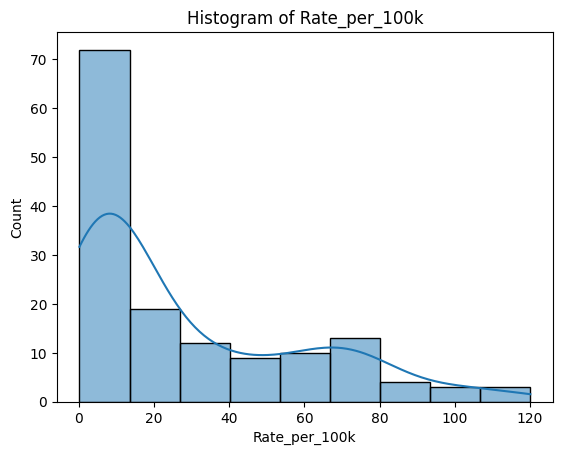

Skewness of Rate_per_100k: 1.1109


In [43]:
from scipy.stats import skew
target_col = 'Rate_per_100k'
y_orig = df_filled[target_col]

sns.histplot(y_orig, kde=True)
plt.title("Histogram of Rate_per_100k")
plt.xlabel("Rate_per_100k")
plt.show()

skew_val = skew(y_orig)
print(f"Skewness of Rate_per_100k: {skew_val:.4f}")

Model Training Using Bagging and Boosting Techniques

XGBoost 

In [44]:
import xgboost as xgb


risk_factors = [
    "Prevalence of overweight (% of adults)",
    "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",
    "Average fat supply (g/cap/day) (3-year average)",
    "Average supply of protein of animal origin (g/cap/day) (3-year average)",
    "Sugar (Raw Equivalent)",
    "Prevalence of current tobacco use (% of adults)",
    "insufficient_physical_activity_pct",
    "Obese_per_100k"
]

neutral_factors = [
    "Average dietary energy supply adequacy (percent) (3-year average)",
    "Per capita food supply variability (kcal/cap/day)",
    "Carbohydrate (available) supply",
    "Energy supply",
    "Fat supply",
    "Protein supply",
    "Sweeteners, Other",
    "Olive Oil"
]

selected_cols = risk_factors + neutral_factors
target_col = 'Rate_per_100k'


df = df_filled.copy() 

existing_cols = [col for col in selected_cols if col in df.columns]
print("Using columns:", existing_cols)

X = df[existing_cols]
y_orig = df[target_col]
y_log = np.log1p(y_orig)
countries = X.index.to_numpy()


X_num = X.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    index=X.index,
    columns=X_num.columns
)


iso = IsolationForest(contamination=0.05, random_state=42)
mask = iso.fit_predict(X_scaled) == 1

X_clean = X_scaled[mask].copy()
y_log_clean = y_log[mask]
y_orig_clean = y_orig[mask]
ct_clean = countries[mask]

print(f"\nOutliers removed: {len(X_scaled) - len(X_clean)}; remaining: {len(X_clean)}")

outlier_indices = np.where(mask == 0)[0]
if len(outlier_indices) > 0:
    print("\nRemoved outliers (countries):")
    for idx in outlier_indices:
        print(f"- Country: {countries[idx]}")


param_dist = {
    'n_estimators': [300, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

xgb_base = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

loo = LeaveOneOut()
rnd_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=30,
    cv=loo,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=1,
    verbose=1
)

rnd_search.fit(X_clean, y_log_clean)
best_params = rnd_search.best_params_
print("\nBest XGB parameters:", best_params)


def run_xgb_loocv(params, X, y_log, y_orig, countries):
    loo = LeaveOneOut()
    records = []
    ytl, ypl, yto, ypo = [], [], [], []

    for train, test in loo.split(X):
        Xtr, Xte = X.iloc[train], X.iloc[test]
        ytr = y_log.iloc[train]

        model = xgb.XGBRegressor(**params, objective='reg:squarederror', random_state=42)
        model.fit(Xtr, ytr)
        pred_l = model.predict(Xte)[0]

        idx = test[0]
        act = y_orig.iloc[idx]
        pred = np.expm1(pred_l)

        ytl.append(y_log.iloc[idx])
        ypl.append(pred_l)
        yto.append(act)
        ypo.append(pred)

        records.append({
            'Country': countries[idx],
            'Actual': int(round(act)),
            'Predicted': int(round(pred)),
            'Error': abs(act - pred)
        })

    df_res = pd.DataFrame(records)
    rmse_l = np.sqrt(mean_squared_error(ytl, ypl))
    r2_l = r2_score(ytl, ypl)
    rmse_o = np.sqrt(mean_squared_error(yto, ypo))
    r2_o = r2_score(yto, ypo)

    print(f"\nRMSE (log-target) = {rmse_l:.4f}")
    print(f"R² (log-target)   = {r2_l:.4f}")
    print(f"RMSE (original)   = {rmse_o:.4f}")
    print(f"R² (original)     = {r2_o:.4f}\n")

    return df_res


xgb_results_tuned = run_xgb_loocv(
    best_params,
    X_clean,
    y_log_clean,
    y_orig_clean,
    ct_clean
)

pd.set_option('display.max_rows', None)
print("All countries (tuned XGB):")
print(xgb_results_tuned[['Country', 'Actual', 'Predicted']])
print("\nTop 10 countries by absolute error (tuned XGB):")
print(xgb_results_tuned.nlargest(10, 'Error')[['Country', 'Actual', 'Predicted', 'Error']])


Using columns: ['Prevalence of overweight (% of adults)', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)', 'Average fat supply (g/cap/day) (3-year average)', 'Average supply of protein of animal origin (g/cap/day) (3-year average)', 'Sugar (Raw Equivalent)', 'Prevalence of current tobacco use (% of adults)', 'insufficient_physical_activity_pct', 'Obese_per_100k', 'Average dietary energy supply adequacy (percent) (3-year average)', 'Per capita food supply variability (kcal/cap/day)', 'Carbohydrate (available) supply', 'Energy supply', 'Fat supply', 'Protein supply', 'Sweeteners, Other', 'Olive Oil']

Outliers removed: 8; remaining: 137

Removed outliers (countries):
- Country: central african republic
- Country: cuba
- Country: iceland
- Country: vanuatu
- Country: niger
- Country: rwanda
- Country: sao tome and principe
- Country: united arab emirates
Fitting 137 folds for each of 30 candidates, totalling 4110 fits

Best XGB parame

SHAP Visualization for XGBoost

C:\Users\Pavle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Pavle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


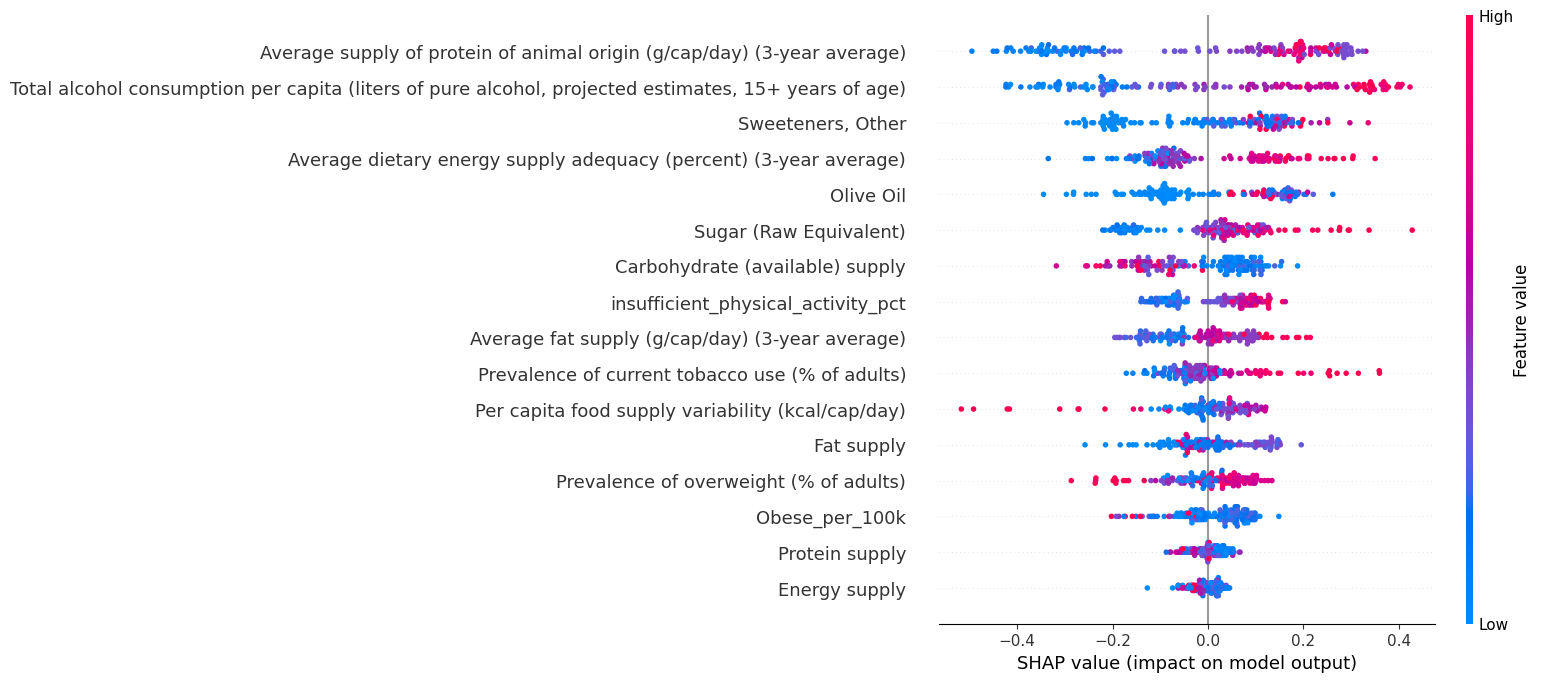

In [45]:
import shap

selected_cols = [
    "Prevalence of overweight (% of adults)",
    "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",
    "Average fat supply (g/cap/day) (3-year average)",
    "Average supply of protein of animal origin (g/cap/day) (3-year average)",
    "Sugar (Raw Equivalent)",
    "Prevalence of current tobacco use (% of adults)",
    "insufficient_physical_activity_pct",
    "Obese_per_100k",
    "Average dietary energy supply adequacy (percent) (3-year average)",
    "Per capita food supply variability (kcal/cap/day)",
    "Carbohydrate (available) supply",
    "Energy supply",
    "Fat supply",
    "Protein supply",
    "Sweeteners, Other",
    "Olive Oil"
]

X = df[selected_cols]
y = np.log1p(df[target_col]) 


X_num = X.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    index=X.index,
    columns=X_num.columns
)

best_params = {
    'subsample': 0.5,
    'n_estimators': 1000,
    'min_child_weight': 1,
    'max_depth': 3,
    'learning_rate': 0.1,
    'gamma': 0,
    'colsample_bytree': 0.5,
    'objective': 'reg:squarederror',
    'random_state': 42
}

model_xgb = xgb.XGBRegressor(**best_params)
model_xgb.fit(X_scaled, y)

explainer = shap.TreeExplainer(model_xgb, feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X_scaled)

shap.summary_plot(shap_values, X_scaled, max_display=25)


Accuracy (R²) on test data: 0.68


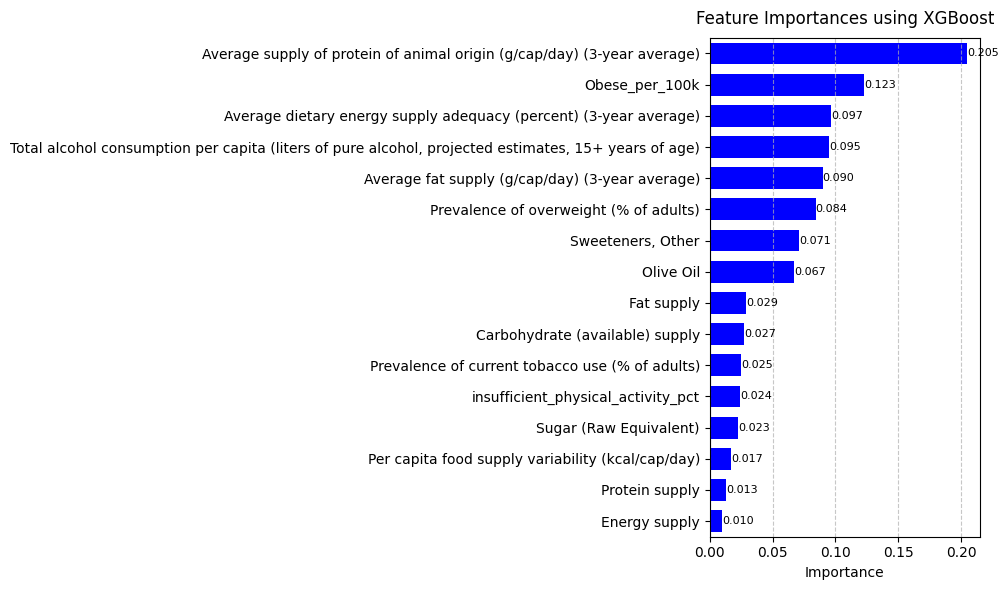

In [46]:
selected_cols = [
    "Prevalence of overweight (% of adults)",
    "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",
    "Average fat supply (g/cap/day) (3-year average)",
    "Average supply of protein of animal origin (g/cap/day) (3-year average)",
    "Sugar (Raw Equivalent)",
    "Prevalence of current tobacco use (% of adults)",
    "insufficient_physical_activity_pct",
    "Obese_per_100k",
    "Average dietary energy supply adequacy (percent) (3-year average)",
    "Per capita food supply variability (kcal/cap/day)",
    "Carbohydrate (available) supply",
    "Energy supply",
    "Fat supply",
    "Protein supply",
    "Sweeteners, Other",
    "Olive Oil"
]

X_clean = X_clean[selected_cols]
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_log_clean, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)
print("Accuracy (R²) on test data: {:.2f}".format(model.score(X_test, y_test)))

tree_importance = model.feature_importances_
tree_sorted_idx = np.argsort(tree_importance)
tree_indices = np.arange(0, len(tree_importance)) + 0.5

plt.figure(figsize=(10, 6))
bars = plt.barh(tree_indices, tree_importance[tree_sorted_idx], height=0.7, color='blue')
plt.yticks(tree_indices, X_clean.columns[tree_sorted_idx], fontsize=10)
plt.ylim((0, len(tree_importance)))
plt.title("Feature Importances using XGBoost", fontsize=12, pad=10)
plt.xlabel("Importance", fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
             ha='left', va='center', fontsize=8)
plt.tight_layout()
plt.show()

RandomForestRegressor

In [47]:
from sklearn.ensemble import IsolationForest, RandomForestRegressor

selected_cols = [
    "Prevalence of overweight (% of adults)",
    "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",
    "Average fat supply (g/cap/day) (3-year average)",
    "Average supply of protein of animal origin (g/cap/day) (3-year average)",
    "Sugar (Raw Equivalent)",
    "Prevalence of current tobacco use (% of adults)",
    "insufficient_physical_activity_pct",
    "Obese_per_100k",
    "Average dietary energy supply adequacy (percent) (3-year average)",
    "Per capita food supply variability (kcal/cap/day)",
    "Carbohydrate (available) supply",
    "Energy supply",
    "Fat supply",
    "Protein supply",
    "Sweeteners, Other",
    "Olive Oil"
]

target_col = 'Rate_per_100k'

df = df_filled.copy()  

X = df[selected_cols]
y_orig = df[target_col]
y_log = np.log1p(y_orig)
countries = X.index.to_numpy()


X_num = X.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    index=X.index,
    columns=X_num.columns
)


iso = IsolationForest(contamination=0.05, random_state=42)
mask = iso.fit_predict(X_scaled) == 1
X_clean = X_scaled[mask].copy()
y_log_clean = y_log[mask]
y_orig_clean = y_orig[mask]
ct_clean = countries[mask]

print(f"Outliers removed: {len(X_scaled) - len(X_clean)}; remaining: {len(X_clean)}")

outlier_indices = np.where(mask == 0)[0]
if len(outlier_indices) > 0:
    print("\nRemoved outliers (countries):")
    for idx in outlier_indices:
        print(f"- Country: {countries[idx]}")


param_dist_rf = {
    'n_estimators': [300, 500, 800],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', 0.5]
}

rf_base = RandomForestRegressor(random_state=42)

loo = LeaveOneOut()
rnd_search_rf = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=loo,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=1,
    verbose=1
)
rnd_search_rf.fit(X_clean, y_log_clean)
best_rf_params = rnd_search_rf.best_params_
print("Best RF parameters:", best_rf_params)


def run_rf_loocv(params, X, y_log, y_orig, countries):
    loo = LeaveOneOut()
    records, ytl, ypl, yto, ypo = [], [], [], [], []
    for train_idx, test_idx in loo.split(X):
        Xtr, Xte = X.iloc[train_idx], X.iloc[test_idx]
        ytr = y_log.iloc[train_idx]
        model = RandomForestRegressor(**params, random_state=42)
        model.fit(Xtr, ytr)
        pred_l = model.predict(Xte)[0]
        idx = test_idx[0]
        act = y_orig.iloc[idx]
        pred = np.expm1(pred_l)
        ytl.append(y_log.iloc[idx]); ypl.append(pred_l)
        yto.append(act); ypo.append(pred)
        records.append({
            'Country': countries[idx],
            'Actual': int(round(act)),
            'Predicted': int(round(pred)),
            'Error': abs(act - pred)
        })
    df_res = pd.DataFrame(records)
    rmse_l = np.sqrt(mean_squared_error(ytl, ypl))
    r2_l = r2_score(ytl, ypl)
    rmse_o = np.sqrt(mean_squared_error(yto, ypo))
    r2_o = r2_score(yto, ypo)
    print(f"\nRF LOOCV Performance:")
    print(f"RMSE (log-target) = {rmse_l:.4f}")
    print(f"R² (log-target)   = {r2_l:.4f}")
    print(f"RMSE (original)   = {rmse_o:.4f}")
    print(f"R² (original)     = {r2_o:.4f}\n")
    return df_res


rf_results = run_rf_loocv(
    best_rf_params,
    X_clean,
    y_log_clean,
    y_orig_clean,
    ct_clean
)

pd.set_option('display.max_rows', None)
print("All countries (RF tuned):")
print(rf_results[['Country', 'Actual', 'Predicted']])
print("\nTop 10 countries by absolute error (RF tuned):")
print(rf_results.nlargest(10, 'Error')[['Country', 'Actual', 'Predicted', 'Error']])

Outliers removed: 8; remaining: 137

Removed outliers (countries):
- Country: central african republic
- Country: cuba
- Country: iceland
- Country: vanuatu
- Country: niger
- Country: rwanda
- Country: sao tome and principe
- Country: united arab emirates
Fitting 137 folds for each of 20 candidates, totalling 2740 fits
Best RF parameters: {'n_estimators': 300, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

RF LOOCV Performance:
RMSE (log-target) = 0.5175
R² (log-target)   = 0.7873
RMSE (original)   = 18.7155
R² (original)     = 0.6227

All countries (RF tuned):
                    Country  Actual  Predicted
0               afghanistan       3          5
1                   albania      18         40
2                   algeria      19         19
3                    angola       3          7
4                azerbaijan      18         13
5                 argentina      36         31
6                 australia      71         74
7                   austria      52

SHAP Visualization for RandomForestRegressor

C:\Users\Pavle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


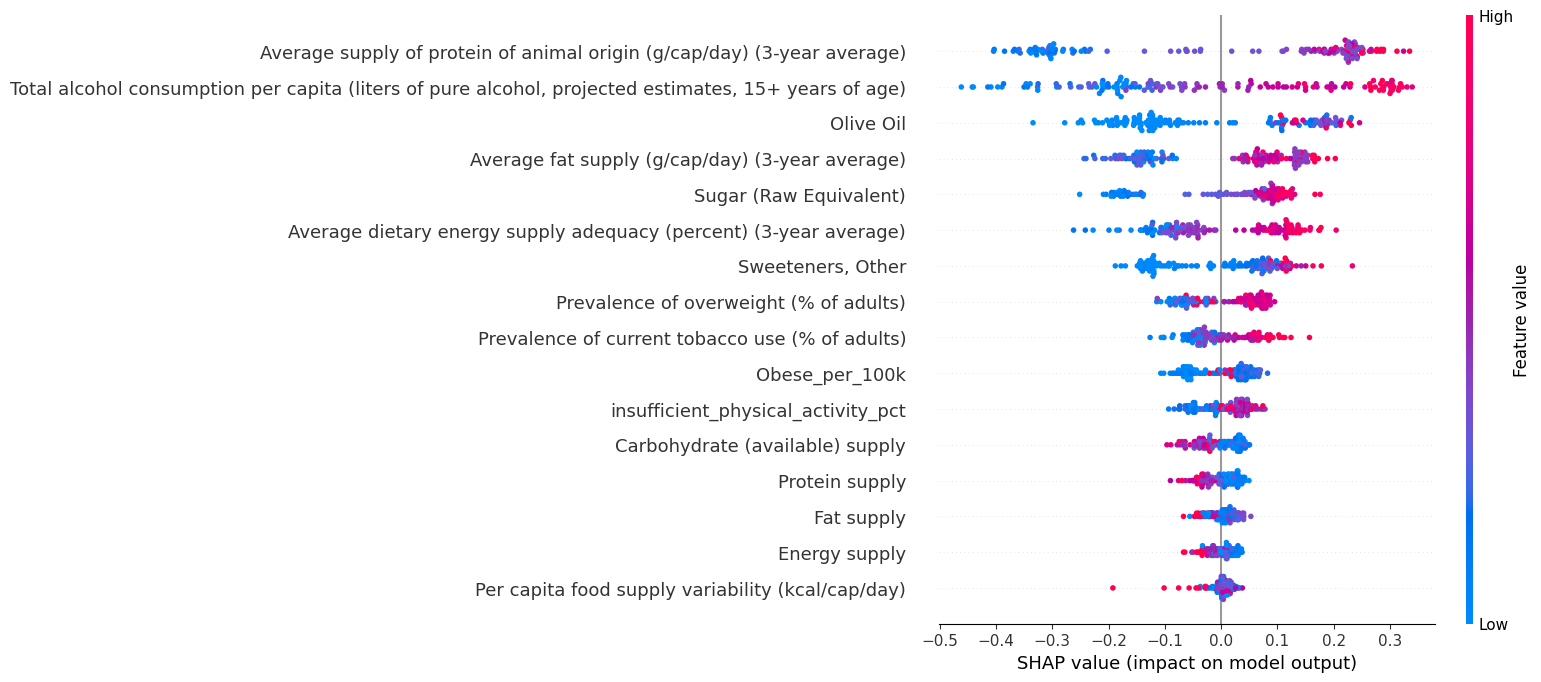

In [48]:
import shap

selected_cols = [
    "Prevalence of overweight (% of adults)",
    "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",
    "Average fat supply (g/cap/day) (3-year average)",
    "Average supply of protein of animal origin (g/cap/day) (3-year average)",
    "Sugar (Raw Equivalent)",
    "Prevalence of current tobacco use (% of adults)",
    "insufficient_physical_activity_pct",
    "Obese_per_100k",
    "Average dietary energy supply adequacy (percent) (3-year average)",
    "Per capita food supply variability (kcal/cap/day)",
    "Carbohydrate (available) supply",
    "Energy supply",
    "Fat supply",
    "Protein supply",
    "Sweeteners, Other",
    "Olive Oil"
]

target_col = 'Rate_per_100k'

X = df[selected_cols] 
y = np.log1p(df[target_col]) 

X_num = X.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    index=X.index,
    columns=X_num.columns
)

best_rf_params = {
    'n_estimators': 300,
    'max_depth': None,
    'min_samples_leaf': 1,
    'max_features': 'log2',
    'random_state': 42
}
model_rf = RandomForestRegressor(**best_rf_params)
model_rf.fit(X_scaled, y)

explainer_rf = shap.TreeExplainer(model_rf)
shap_values_rf = explainer_rf.shap_values(X_scaled)

shap.summary_plot(shap_values_rf, X_scaled, max_display=25)

Accuracy (R²) on test data: 0.69


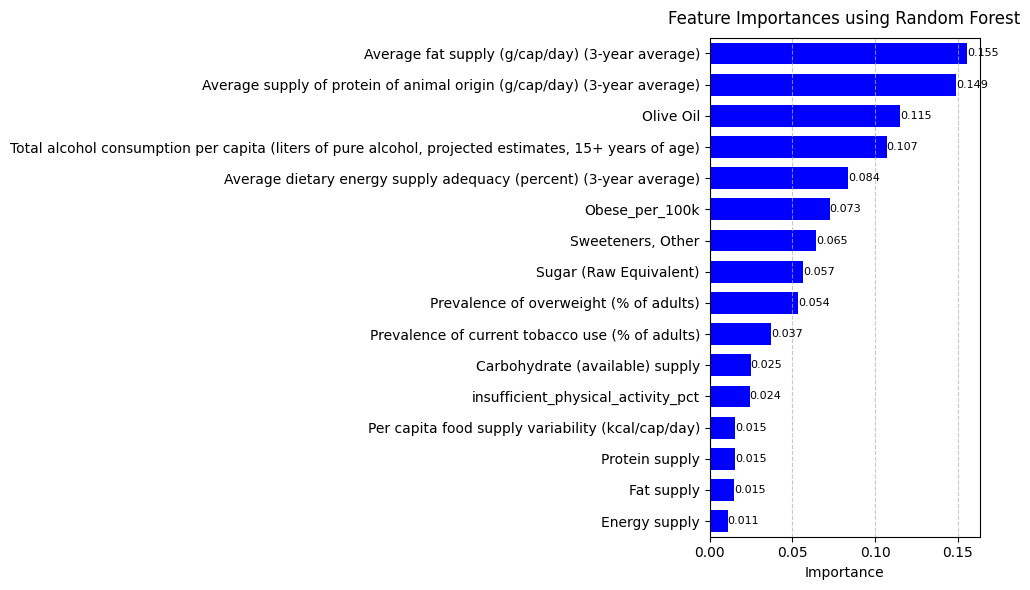

In [49]:
import matplotlib.pyplot as plt

X_clean = X_clean[selected_cols]

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_log_clean, test_size=0.2, random_state=42
)

model = RandomForestRegressor(**best_rf_params)
model.fit(X_train, y_train)

print("Accuracy (R²) on test data: {:.2f}".format(model.score(X_test, y_test)))

tree_importance = model.feature_importances_
tree_sorted_idx = np.argsort(tree_importance)
tree_indices = np.arange(0, len(tree_importance)) + 0.5

plt.figure(figsize=(10, 6))
bars = plt.barh(tree_indices, tree_importance[tree_sorted_idx], height=0.7, color='blue')
plt.yticks(tree_indices, X_clean.columns[tree_sorted_idx], fontsize=10)
plt.ylim((0, len(tree_importance)))
plt.title("Feature Importances using Random Forest", fontsize=12, pad=10)
plt.xlabel("Importance", fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
             ha='left', va='center', fontsize=8)
plt.tight_layout()
plt.show()

KNeighborsRegressor

In [50]:
from sklearn.neighbors import KNeighborsRegressor

risk_factors = [
    "Prevalence of overweight (% of adults)",
    "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",
    "Average fat supply (g/cap/day) (3-year average)",
    "Average supply of protein of animal origin (g/cap/day) (3-year average)",
    "Sugar (Raw Equivalent)",
    "Prevalence of current tobacco use (% of adults)",
    "insufficient_physical_activity_pct",
    "Obese_per_100k"
]

neutral_factors = [
    "Average dietary energy supply adequacy (percent) (3-year average)",
    "Per capita food supply variability (kcal/cap/day)",
    "Carbohydrate (available) supply",
    "Energy supply",
    "Fat supply",
    "Protein supply",
    "Sweeteners, Other",
    "Olive Oil"
]

selected_cols = risk_factors + neutral_factors
target_col = 'Rate_per_100k'

df = df_filled.copy()
existing_cols = [col for col in selected_cols if col in df.columns]
print("Using columns:", existing_cols)

X = df[existing_cols]
y_orig = df[target_col]
y_log = np.log1p(y_orig)
countries = X.index.to_numpy()


X_num = X.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    index=X.index,
    columns=X_num.columns
)

iso = IsolationForest(contamination=0.05, random_state=42)
mask = iso.fit_predict(X_scaled) == 1

X_clean = X_scaled[mask].copy()
y_log_clean = y_log[mask]
y_orig_clean = y_orig[mask]
ct_clean = countries[mask]

print(f"\nOutliers removed: {len(X_scaled) - len(X_clean)}; remaining: {len(X_clean)}")

outlier_indices = np.where(mask == 0)[0]
if len(outlier_indices) > 0:
    print("\nRemoved outliers (countries):")
    for idx in outlier_indices:
        print(f"- Country: {countries[idx]}")


param_dist = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}

knn_base = KNeighborsRegressor()

loo = LeaveOneOut()
rnd_search = RandomizedSearchCV(
    estimator=knn_base,
    param_distributions=param_dist,
    n_iter=15,
    cv=loo,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=1,
    verbose=1
)

rnd_search.fit(X_clean, y_log_clean)
best_params = rnd_search.best_params_
print("\nBest KNN parameters:", best_params)

def run_knn_loocv(params, X, y_log, y_orig, countries):
    loo = LeaveOneOut()
    records = []
    ytl, ypl, yto, ypo = [], [], [], []

    for train, test in loo.split(X):
        Xtr, Xte = X.iloc[train], X.iloc[test]
        ytr = y_log.iloc[train]

        model = KNeighborsRegressor(**params)
        model.fit(Xtr, ytr)
        pred_l = model.predict(Xte)[0]

        idx = test[0]
        act = y_orig.iloc[idx]
        pred = np.expm1(pred_l)

        ytl.append(y_log.iloc[idx]); ypl.append(pred_l)
        yto.append(act); ypo.append(pred)

        records.append({
            'Country': countries[idx],
            'Actual': int(round(act)),
            'Predicted': int(round(pred)),
            'Error': abs(act - pred)
        })

    df_res = pd.DataFrame(records)
    rmse_l = np.sqrt(mean_squared_error(ytl, ypl))
    r2_l = r2_score(ytl, ypl)
    rmse_o = np.sqrt(mean_squared_error(yto, ypo))
    r2_o = r2_score(yto, ypo)

    print(f"\nRMSE (log-target) = {rmse_l:.4f}")
    print(f"R² (log-target)   = {r2_l:.4f}")
    print(f"RMSE (original)   = {rmse_o:.4f}")
    print(f"R² (original)     = {r2_o:.4f}\n")

    return df_res

knn_results_tuned = run_knn_loocv(
    best_params,
    X_clean,
    y_log_clean,
    y_orig_clean,
    ct_clean
)

pd.set_option('display.max_rows', None)
print("All countries (tuned KNN):")
print(knn_results_tuned[['Country', 'Actual', 'Predicted']])
print("\nTop 10 countries by absolute error (tuned KNN):")
print(knn_results_tuned.nlargest(10, 'Error')[['Country', 'Actual', 'Predicted', 'Error']])


Using columns: ['Prevalence of overweight (% of adults)', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)', 'Average fat supply (g/cap/day) (3-year average)', 'Average supply of protein of animal origin (g/cap/day) (3-year average)', 'Sugar (Raw Equivalent)', 'Prevalence of current tobacco use (% of adults)', 'insufficient_physical_activity_pct', 'Obese_per_100k', 'Average dietary energy supply adequacy (percent) (3-year average)', 'Per capita food supply variability (kcal/cap/day)', 'Carbohydrate (available) supply', 'Energy supply', 'Fat supply', 'Protein supply', 'Sweeteners, Other', 'Olive Oil']

Outliers removed: 8; remaining: 137

Removed outliers (countries):
- Country: central african republic
- Country: cuba
- Country: iceland
- Country: vanuatu
- Country: niger
- Country: rwanda
- Country: sao tome and principe
- Country: united arab emirates
Fitting 137 folds for each of 15 candidates, totalling 2055 fits

Best KNN parame

LinearRegression

In [51]:
from sklearn.linear_model import LinearRegression

risk_factors = [
    "Prevalence of overweight (% of adults)",
    "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",
    "Average fat supply (g/cap/day) (3-year average)",
    "Average supply of protein of animal origin (g/cap/day) (3-year average)",
    "Sugar (Raw Equivalent)",
    "Prevalence of current tobacco use (% of adults)",
    "insufficient_physical_activity_pct",
    "Obese_per_100k"
]

neutral_factors = [
    "Average dietary energy supply adequacy (percent) (3-year average)",
    "Per capita food supply variability (kcal/cap/day)",
    "Carbohydrate (available) supply",
    "Energy supply",
    "Fat supply",
    "Protein supply",
    "Sweeteners, Other",
    "Olive Oil"
]

selected_cols = risk_factors + neutral_factors
target_col = 'Rate_per_100k'

df = df_filled.copy()
existing_cols = [col for col in selected_cols if col in df.columns]
print("Using columns:", existing_cols)

X = df[existing_cols]
y_orig = df[target_col]
y_log = np.log1p(y_orig)
countries = X.index.to_numpy()

X_num = X.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    index=X.index,
    columns=X_num.columns
)

iso = IsolationForest(contamination=0.05, random_state=42)
mask = iso.fit_predict(X_scaled) == 1

X_clean = X_scaled[mask].copy()
y_log_clean = y_log[mask]
y_orig_clean = y_orig[mask]
ct_clean = countries[mask]

print(f"\nOutliers removed: {len(X_scaled) - len(X_clean)}; remaining: {len(X_clean)}")

outlier_indices = np.where(mask == 0)[0]
if len(outlier_indices) > 0:
    print("\nRemoved outliers (countries):")
    for idx in outlier_indices:
        print(f"- Country: {countries[idx]}")

def run_linear_loocv(X, y_log, y_orig, countries):
    loo = LeaveOneOut()
    records = []
    ytl, ypl, yto, ypo = [], [], [], []

    for train, test in loo.split(X):
        Xtr, Xte = X.iloc[train], X.iloc[test]
        ytr = y_log.iloc[train]

        model = LinearRegression()
        model.fit(Xtr, ytr)
        pred_l = model.predict(Xte)[0]

        idx = test[0]
        act = y_orig.iloc[idx]
        pred = np.expm1(pred_l)

        ytl.append(y_log.iloc[idx]); ypl.append(pred_l)
        yto.append(act); ypo.append(pred)

        records.append({
            'Country': countries[idx],
            'Actual': int(round(act)),
            'Predicted': int(round(pred)),
            'Error': abs(act - pred)
        })

    df_res = pd.DataFrame(records)
    rmse_l = np.sqrt(mean_squared_error(ytl, ypl))
    r2_l = r2_score(ytl, ypl)
    rmse_o = np.sqrt(mean_squared_error(yto, ypo))
    r2_o = r2_score(yto, ypo)

    print(f"\nRMSE (log-target) = {rmse_l:.4f}")
    print(f"R² (log-target)   = {r2_l:.4f}")
    print(f"RMSE (original)   = {rmse_o:.4f}")
    print(f"R² (original)     = {r2_o:.4f}\n")

    return df_res

linear_results = run_linear_loocv(
    X_clean,
    y_log_clean,
    y_orig_clean,
    ct_clean
)

pd.set_option('display.max_rows', None)
print("All countries (Linear Regression):")
print(linear_results[['Country', 'Actual', 'Predicted']])
print("\nTop 10 countries by absolute error (Linear Regression):")
print(linear_results.nlargest(10, 'Error')[['Country', 'Actual', 'Predicted', 'Error']])


Using columns: ['Prevalence of overweight (% of adults)', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)', 'Average fat supply (g/cap/day) (3-year average)', 'Average supply of protein of animal origin (g/cap/day) (3-year average)', 'Sugar (Raw Equivalent)', 'Prevalence of current tobacco use (% of adults)', 'insufficient_physical_activity_pct', 'Obese_per_100k', 'Average dietary energy supply adequacy (percent) (3-year average)', 'Per capita food supply variability (kcal/cap/day)', 'Carbohydrate (available) supply', 'Energy supply', 'Fat supply', 'Protein supply', 'Sweeteners, Other', 'Olive Oil']

Outliers removed: 8; remaining: 137

Removed outliers (countries):
- Country: central african republic
- Country: cuba
- Country: iceland
- Country: vanuatu
- Country: niger
- Country: rwanda
- Country: sao tome and principe
- Country: united arab emirates

RMSE (log-target) = 0.5808
R² (log-target)   = 0.7321
RMSE (original)   = 23.230

Support Vector Regression (SVR)

In [52]:
from sklearn.svm import SVR

risk_factors = [
    "Prevalence of overweight (% of adults)",
    "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",
    "Average fat supply (g/cap/day) (3-year average)",
    "Average supply of protein of animal origin (g/cap/day) (3-year average)",
    "Sugar (Raw Equivalent)",
    "Prevalence of current tobacco use (% of adults)",
    "insufficient_physical_activity_pct",
    "Obese_per_100k"
]

neutral_factors = [
    "Average dietary energy supply adequacy (percent) (3-year average)",
    "Per capita food supply variability (kcal/cap/day)",
    "Carbohydrate (available) supply",
    "Energy supply",
    "Fat supply",
    "Protein supply",
    "Sweeteners, Other",
    "Olive Oil"
]

selected_cols = risk_factors + neutral_factors
target_col = 'Rate_per_100k'

df = df_filled.copy()
existing_cols = [col for col in selected_cols if col in df.columns]
print("Using columns:", existing_cols)

X = df[existing_cols]
y_orig = df[target_col]
y_log = np.log1p(y_orig)
countries = X.index.to_numpy()


X_num = X.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    index=X.index,
    columns=X_num.columns
)


iso = IsolationForest(contamination=0.05, random_state=42)
mask = iso.fit_predict(X_scaled) == 1

X_clean = X_scaled[mask].copy()
y_log_clean = y_log[mask]
y_orig_clean = y_orig[mask]
ct_clean = countries[mask]

print(f"\nOutliers removed: {len(X_scaled) - len(X_clean)}; remaining: {len(X_clean)}")

outlier_indices = np.where(mask == 0)[0]
if len(outlier_indices) > 0:
    print("\nRemoved outliers (countries):")
    for idx in outlier_indices:
        print(f"- Country: {countries[idx]}")

param_dist = {
    'C': [0.1, 1.0, 10.0, 100.0],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.1, 1.0]
}

svr_base = SVR()

loo = LeaveOneOut()
rnd_search = RandomizedSearchCV(
    estimator=svr_base,
    param_distributions=param_dist,
    n_iter=20,
    cv=loo,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=1,
    verbose=1
)

rnd_search.fit(X_clean, y_log_clean)
best_params = rnd_search.best_params_
print("\nBest SVR parameters:", best_params)

def run_svr_loocv(params, X, y_log, y_orig, countries):
    loo = LeaveOneOut()
    records = []
    ytl, ypl, yto, ypo = [], [], [], []

    for train, test in loo.split(X):
        Xtr, Xte = X.iloc[train], X.iloc[test]
        ytr = y_log.iloc[train]

        model = SVR(**params)
        model.fit(Xtr, ytr)
        pred_l = model.predict(Xte)[0]

        idx = test[0]
        act = y_orig.iloc[idx]
        pred = np.expm1(pred_l)

        ytl.append(y_log.iloc[idx]); ypl.append(pred_l)
        yto.append(act); ypo.append(pred)

        records.append({
            'Country': countries[idx],
            'Actual': int(round(act)),
            'Predicted': int(round(pred)),
            'Error': abs(act - pred)
        })

    df_res = pd.DataFrame(records)
    rmse_l = np.sqrt(mean_squared_error(ytl, ypl))
    r2_l = r2_score(ytl, ypl)
    rmse_o = np.sqrt(mean_squared_error(yto, ypo))
    r2_o = r2_score(yto, ypo)

    print(f"\nRMSE (log-target) = {rmse_l:.4f}")
    print(f"R² (log-target)   = {r2_l:.4f}")
    print(f"RMSE (original)   = {rmse_o:.4f}")
    print(f"R² (original)     = {r2_o:.4f}\n")

    return df_res

svr_results = run_svr_loocv(
    best_params,
    X_clean,
    y_log_clean,
    y_orig_clean,
    ct_clean
)

pd.set_option('display.max_rows', None)
print("All countries (tuned SVR):")
print(svr_results[['Country', 'Actual', 'Predicted']])
print("\nTop 10 countries by absolute error (tuned SVR):")
print(svr_results.nlargest(10, 'Error')[['Country', 'Actual', 'Predicted', 'Error']])


Using columns: ['Prevalence of overweight (% of adults)', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)', 'Average fat supply (g/cap/day) (3-year average)', 'Average supply of protein of animal origin (g/cap/day) (3-year average)', 'Sugar (Raw Equivalent)', 'Prevalence of current tobacco use (% of adults)', 'insufficient_physical_activity_pct', 'Obese_per_100k', 'Average dietary energy supply adequacy (percent) (3-year average)', 'Per capita food supply variability (kcal/cap/day)', 'Carbohydrate (available) supply', 'Energy supply', 'Fat supply', 'Protein supply', 'Sweeteners, Other', 'Olive Oil']

Outliers removed: 8; remaining: 137

Removed outliers (countries):
- Country: central african republic
- Country: cuba
- Country: iceland
- Country: vanuatu
- Country: niger
- Country: rwanda
- Country: sao tome and principe
- Country: united arab emirates
Fitting 137 folds for each of 20 candidates, totalling 2740 fits

Best SVR parame

Clustering

In [147]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

top_features = [
    "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",
    "Average fat supply (g/cap/day) (3-year average)",
    "Average supply of protein of animal origin (g/cap/day) (3-year average)",
    "insufficient_physical_activity_pct",
    "Obese_per_100k",
    "Average dietary energy supply adequacy (percent) (3-year average)",
    "Sweeteners, Other"
]

existing_cols = [col for col in top_features if col in df.columns]
X = df[existing_cols]

scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    index=X.index,
    columns=existing_cols
)

Silhouette score

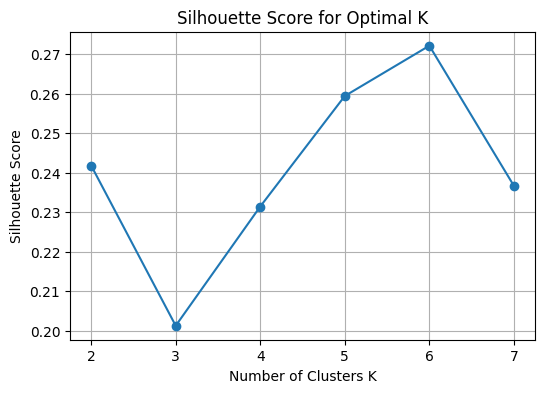

Optimal number of clusters based on Silhouette Score: 6


In [148]:
silhouette_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.grid(True)
plt.show()

optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")

Elbow method

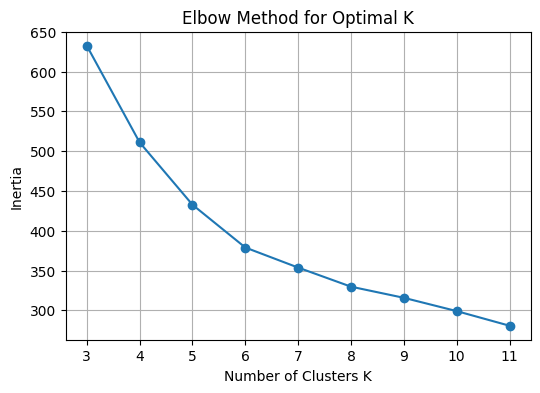

In [153]:
inertia = []
K_range = range(3, 12)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [154]:
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster_opt'] = kmeans_opt.fit_predict(X_scaled)
print(df['Cluster_opt'].value_counts())
print(df.groupby('Cluster_opt')[existing_cols].mean())

Cluster_opt
4    47
0    41
5    24
1    19
3     8
2     6
Name: count, dtype: int64
             Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
Cluster_opt                                                                                                         
0                                                     2.627512                                                      
1                                                     8.057368                                                      
2                                                     4.615000                                                      
3                                                     8.880000                                                      
4                                                     3.875298                                                      
5                                                    10.826250                                 

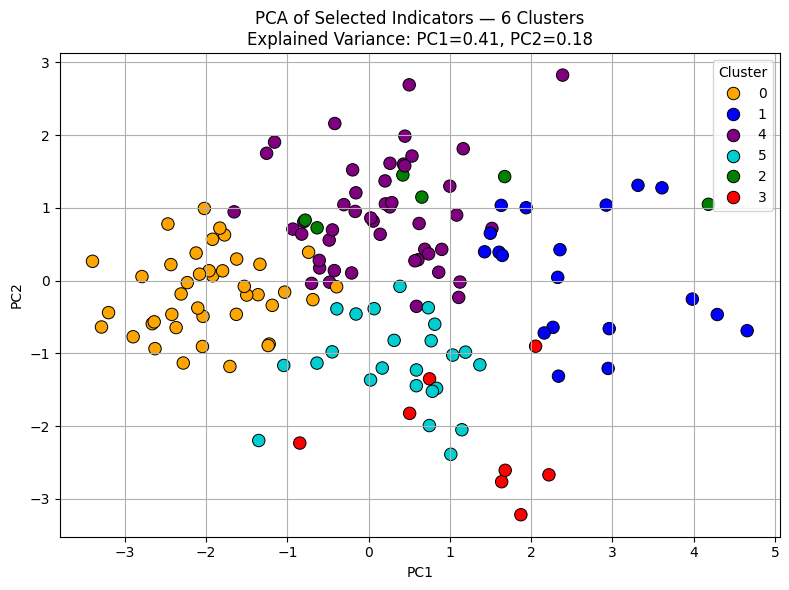

In [155]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame({
    'PC1': coords[:, 0],
    'PC2': coords[:, 1],
    'Cluster': df['Cluster_opt'].astype(str)
}, index=X_scaled.index)


custom_palette = {
    '0': '#FFA500',  
    '1': '#0000FF',  
    '2': '#008000',  
    '3': '#FF0000', 
    '4': '#800080',
    '5': '#00CED1'  
}

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='Cluster',
    palette=custom_palette,
    s=80,
    edgecolor='k'
)

var1, var2 = pca.explained_variance_ratio_[:2]
plt.title(f'PCA of Selected Indicators — {optimal_k} Clusters\nExplained Variance: PC1={var1:.2f}, PC2={var2:.2f}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [156]:
cluster_groups = df.groupby('Cluster_opt').apply(lambda x: list(x.index))

cluster_descriptions = {
    0: "Cluster 0 — 🟧 Balanced intake; moderate sugar & alcohol; elevated obesity",
    1: "Cluster 1 — 🟪 Low intake across all indicators; lowest obesity and CRC risk",
    2: "Cluster 2 — 🔴 High protein & obesity; elevated sugar and alcohol — highest CRC risk",
    3: "Cluster 3 — 🟦 Transitional profile; moderate sugar & alcohol — mid-range risk",
    4: "Cluster 4 — 🟩 Mixed intake; elevated sugar, moderate obesity — emerging risk",
    5: "Cluster 5 — 🔵 Low protein & alcohol; moderate sugar — reduced but uncertain risk"
}

for cluster_id, countries in cluster_groups.items():
    print(f"{cluster_descriptions.get(cluster_id, f'Cluster {cluster_id}')}")  
    print(f"({len(countries)} countries)")  
    print(", ".join(sorted(countries)))  
    print("\n" + "-"*80 + "\n")

Cluster 0 — 🟧 Balanced intake; moderate sugar & alcohol; elevated obesity
(41 countries)
afghanistan, angola, bangladesh, benin, botswana, burundi, cambodia, central african republic, chad, comoros, djibouti, ethiopia, ghana, guinea, guinea-bissau, haiti, indonesia, kenya, lesotho, liberia, madagascar, malawi, mozambique, myanmar, namibia, nepal, niger, nigeria, papua new guinea, rwanda, senegal, sierra leone, solomon islands, somalia, sri lanka, tajikistan, timor-leste, togo, turkmenistan, zambia, zimbabwe

--------------------------------------------------------------------------------

Cluster 1 — 🟪 Low intake across all indicators; lowest obesity and CRC risk
(19 countries)
albania, argentina, australia, austria, belarus, brazil, canada, cyprus, denmark, finland, french polynesia, israel, kazakhstan, montenegro, new zealand, norway, poland, portugal, uruguay

--------------------------------------------------------------------------------

Cluster 2 — 🔴 High protein & obesity; elev

C:\Users\Pavle\AppData\Local\Temp\ipykernel_21160\3058352480.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_groups = df.groupby('Cluster_opt').apply(lambda x: list(x.index))
